# Personal Project main notebook

In [165]:
# Ignoring warning messages from python
import warnings
warnings.filterwarnings('ignore')

# General use imports
import pandas as pd
import numpy as np

# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Modules and data
import requests
import acquire
import prep
from vega_datasets import data
from datetime import datetime

# I. Acquire

In [2]:
# Acquiring the data from the csv file and displaying first 5 rows

transactions1 = acquire.get_local_transactions()
transactions1.head()

,Date,Description,Original Description,Amount,Transaction Type,Category,Account Name,Labels,Notes
0,6/29/2022,DEPOSIT@MOBILE,DEPOSIT@MOBILE,206.25,credit,Transfer,Checkarama,NaN,NaN
1,6/28/2022,"MATTHEWS VET SERVICES, P","MATTHEWS VET SERVICES, P",13.20,debit,Veterinary,CREDIT CARD,NaN,NaN
2,6/28/2022,STARBUCKS STORE 24306,STARBUCKS STORE 24306,5.57,debit,Coffee Shops,CREDIT CARD,NaN,NaN
3,6/28/2022,PAYPAL *HULU,PAYPAL *HULU,14.16,debit,Television,CREDIT CARD,NaN,NaN
4,6/28/2022,H-E-B #618,H-E-B #618,20.56,debit,Groceries,CREDIT CARD,NaN,NaN


# II. Clean & Prepare

>## High level exploration before Cleaning and preparation

In [3]:
# Checking the number of rows and columns

transactions1.shape

(7872, 9)

In [4]:
# Comparing the Description and the Original Description columns to see which is worth dropping

transactions1[['Description', 'Original Description']]

,Description,Original Description
0,DEPOSIT@MOBILE,DEPOSIT@MOBILE
1,"MATTHEWS VET SERVICES, P","MATTHEWS VET SERVICES, P"
2,STARBUCKS STORE 24306,STARBUCKS STORE 24306
3,PAYPAL *HULU,PAYPAL *HULU
4,H-E-B #618,H-E-B #618
...,...,...
7867,Ultra Foods Qps,ULTRA FOODS #8761 QPS LOMBARD
7868,Pennys Noodle Shop,PENNY'S NOODLE SHOPQPS CHICAGO
7869,Amazon Music,MUSIC DWNLDS 866-216
7870,Calling Card,CALLINGCARDS/CONFERENC (866)29


In [5]:
# Checking the df nulls

transactions1.isnull().sum()

Date                       0
Description                0
Original Description       0
Amount                     0
Transaction Type           0
Category                   3
Account Name               0
Labels                  7870
Notes                   7862
dtype: int64

In [6]:
# Checking the specific crows of the Category column

transactions1[transactions1['Category'].isnull()]

,Date,Description,Original Description,Amount,Transaction Type,Category,Account Name,Labels,Notes
5996,3/02/2015,Payment,Payment,10.0,credit,NaN,Stafford Loans U.S. DEPARTMENT OF EDUCATION,NaN,NaN
5997,3/02/2015,Pending,Pending,10.0,credit,NaN,Stafford Loans U.S. DEPARTMENT OF EDUCATION,NaN,NaN
5998,2/28/2015,Payment,Payment,40.0,credit,NaN,Stafford Loans U.S. DEPARTMENT OF EDUCATION,NaN,NaN


>## Takeaways
    - The df contains duplicates
    - The df has nulls in great number in labels and Notes columns
    - The df has much fewer nulls in the Category column
    - The Description and the Original Description are duplicates
    - These columns contain special characters
    - There is a date column
>## Actions
    - Remove duplicates
    - Drop Labels, Notes, and Original Description
    - Remove special characters from Description
    - Rename columns for readability
    - Make Account Name and Description's content into lower case
    - Set Date as INDEX

>## Cleaning

In [7]:
# Printing the column names into a list without a line break

a = transactions1.columns.tolist()
print(a,)

['Date', 'Description', 'Original Description', 'Amount', 'Transaction Type', 'Category', 'Account Name', 'Labels', 'Notes']


In [8]:
# Assigning the list of columns to a variable

columns = ['Date', 'Description', 'Original Description', 'Amount', 'Transaction Type', 'Category', 'Account Name', 'Labels', 'Notes']

In [10]:
# Displaying duplicate rows in count and percent

prep.multi_frequency(transactions1, columns)

,num_rows_missing,pct_rows_missing
Date,0,0.000000
Description,0,0.000000
Original Description,0,0.000000
Amount,0,0.000000
Transaction Type,0,0.000000
Category,3,0.038110
Account Name,0,0.000000
Labels,7870,99.974593
Notes,7862,99.872967


In [12]:
# Dropping dupicates and keeping the entries detected and reassigning the df to a new variable

transactions2 = transactions1.drop_duplicates()

In [13]:
transactions2.shape

(7797, 9)

In [14]:
# Dropping columns that are not useful

transactions3 = transactions2.drop(['Account Name', 'Labels', 'Notes', 'Original Description'], axis = 1)

In [15]:
transactions3.head()

,Date,Description,Amount,Transaction Type,Category
0,6/29/2022,DEPOSIT@MOBILE,206.25,credit,Transfer
1,6/28/2022,"MATTHEWS VET SERVICES, P",13.20,debit,Veterinary
2,6/28/2022,STARBUCKS STORE 24306,5.57,debit,Coffee Shops
3,6/28/2022,PAYPAL *HULU,14.16,debit,Television
4,6/28/2022,H-E-B #618,20.56,debit,Groceries


In [16]:
# Checking the nulls in the Category column

transactions3[transactions3['Category'].isnull()]

,Date,Description,Amount,Transaction Type,Category
5996,3/02/2015,Payment,10.0,credit,NaN
5997,3/02/2015,Pending,10.0,credit,NaN
5998,2/28/2015,Payment,40.0,credit,NaN


In [17]:
# Filling out the nulls with the category 'Education'

transactions4 = prep.handle_missing_values(transactions3)

In [18]:
a = transactions4.columns.tolist()
print(a,)

['Date', 'Description', 'Amount', 'Transaction Type', 'Category']


In [19]:
# Assigning columns to a variable

columns4 = ['Date', 'Description', 'Amount', 'Transaction Type', 'Category']

In [20]:
# Checking nulls

prep.multi_frequency(transactions4, columns4)

,num_rows_missing,pct_rows_missing
Date,0,0.0
Description,0,0.0
Amount,0,0.0
Transaction Type,0,0.0
Category,0,0.0


In [317]:
# Checking the number of unique entries in Description column

transactions4['Description'].nunique()

1714

In [318]:
# Checking the number of unique entries in Transaction Type column (Debit and Credit)

transactions4['Transaction Type'].nunique()

2

In [319]:
# Checking the number of unique entries in Category column

transactions4['Category'].nunique()

111

### *Takeaways*

>**Category and description can help define the type of purchases and their categories so I will keep them both**

>**I will rename the columns and clean up Description. Then set date to a datetime type and an index column**

In [320]:
renamed = {
    'Date': 'date',
    'Description': 'description',
    'Amount': 'amount',
    'Transaction Type': 'transaction_type',
    'Category': 'category'
}

In [321]:
transactions5 = transactions4.rename(columns=renamed)
transactions5.head()

,date,description,amount,transaction_type,category
0,6/29/2022,DEPOSIT@MOBILE,206.25,credit,Transfer
1,6/28/2022,"MATTHEWS VET SERVICES, P",13.20,debit,Veterinary
2,6/28/2022,STARBUCKS STORE 24306,5.57,debit,Coffee Shops
3,6/28/2022,PAYPAL *HULU,14.16,debit,Television
4,6/28/2022,H-E-B #618,20.56,debit,Groceries


In [322]:
transactions5[transactions5.category == 'Travel']

,date,description,amount,transaction_type,category
21,6/23/2022,PAYPAL *DISNEY PLUS,7.63,debit,Travel
121,5/23/2022,PAYPAL *DISNEY PLUS,7.63,debit,Travel
205,4/24/2022,PAYPAL *DISNEY PLUS,7.63,debit,Travel
233,4/11/2022,TXTAG 888 468 9824,10.00,debit,Travel
828,3/12/2020,MERRY CHRISTMAS & ALL,13.15,debit,Travel
889,2/23/2020,Disney,7.63,debit,Travel
916,2/10/2020,Princess,64.00,debit,Travel
960,1/23/2020,Disney,7.63,debit,Travel
1067,12/23/2019,Disney,7.63,debit,Travel
1161,11/19/2019,Princess,72.00,debit,Travel


In [323]:
transactions5['description'] = transactions5['description'].str.strip()

In [324]:
transactions5['description'] = transactions5['description'].str.replace('[#,@,&,*, ,]', '_').str.lower()

In [325]:
transactions5

,date,description,amount,transaction_type,category
0,6/29/2022,deposit_mobile,206.25,credit,Transfer
1,6/28/2022,matthews_vet_services__p,13.20,debit,Veterinary
2,6/28/2022,starbucks_store_24306,5.57,debit,Coffee Shops
3,6/28/2022,paypal__hulu,14.16,debit,Television
4,6/28/2022,h-e-b__618,20.56,debit,Groceries
...,...,...,...,...,...
7867,8/07/2010,ultra_foods_qps,17.84,debit,Food & Dining
7868,8/07/2010,pennys_noodle_shop,26.42,debit,Restaurants
7869,8/05/2010,amazon_music,5.00,debit,Music
7870,8/05/2010,calling_card,20.00,debit,Gift


In [326]:
transactions5['description'] = transactions5['description'].str.replace('__', '_')

In [327]:
transactions5

,date,description,amount,transaction_type,category
0,6/29/2022,deposit_mobile,206.25,credit,Transfer
1,6/28/2022,matthews_vet_services_p,13.20,debit,Veterinary
2,6/28/2022,starbucks_store_24306,5.57,debit,Coffee Shops
3,6/28/2022,paypal_hulu,14.16,debit,Television
4,6/28/2022,h-e-b_618,20.56,debit,Groceries
...,...,...,...,...,...
7867,8/07/2010,ultra_foods_qps,17.84,debit,Food & Dining
7868,8/07/2010,pennys_noodle_shop,26.42,debit,Restaurants
7869,8/05/2010,amazon_music,5.00,debit,Music
7870,8/05/2010,calling_card,20.00,debit,Gift


In [328]:
# Displaying the list of unique values of category

transactions5['category'].unique()

array(['Transfer', 'Veterinary', 'Coffee Shops', 'Television',
       'Groceries', 'Shipping', 'Entertainment', 'Interest Income',
       'Restaurants', 'Gas & Fuel', 'Vacation', 'Shopping', 'Fast Food',
       'Charity', 'Travel', 'Business Services', 'Income',
       'Auto Insurance', 'Utilities', 'Alcohol & Bars',
       'Credit Card Payment', 'Newspapers & Magazines', 'Paycheck',
       'Parking', 'Internet', 'Clothing', 'Cash & ATM',
       'Electronics & Software', 'Air Travel', 'Pharmacy', 'Doctor',
       'Mortgage & Rent', 'Health & Fitness', 'Check',
       'Pet Food & Supplies', 'Books & Supplies', 'Uncategorized',
       'Furnishings', 'Gifts & Donations', 'Life Insurance',
       'Auto Payment', 'Rental Car & Taxi', 'Books', 'Laundry', 'Gift',
       'Ride Share', 'Service & Parts', 'Mobile Phone', 'Federal Tax',
       'Taxes', 'Education', 'Misc Expenses', 'Hotel',
       'Bills & Utilities', 'Service Fee', 'ATM Fee', 'Fees & Charges',
       'Tuition', 'Personal Care', 

>**Many categories can be grouped into one**

        - Income and paycheck
        - Rental Car & Taxi and Ride Share and Taxi/Uber
        - Food & Dining and Restaurants
        - Arsene Allowance and Emily Allowance and Uncategorized and Misc Expenses 
        - Cash & ATM and Transfer for Cash Spending and Transfer
        - Late Fee and Fees & Charges and ATM Fee and Service Fee and Spilt with Roommates 
        - Federal Tax and Taxes
        - Health & Fitness and Gym

In [329]:
transactions5.replace(to_replace=['Paycheck'], value='Income', inplace=True)
transactions5.replace(to_replace=['Rental Car & Taxi', 'Ride Share', 'Taxi/Uber'], value='Taxi', inplace=True)
transactions5.replace(to_replace=['Food & Dining'], value='Restaurants', inplace=True)
transactions5.replace(to_replace=['Arsene Allowance',
                                  'Emily Allowance',
                                  'Uncategorized'], value='Miscellaneous', inplace=True)
transactions5.replace(to_replace=['Cash & ATM',
                                  'Transfer for Cash Spending', 'Transfer'], value='Cash', inplace=True)
transactions5.replace(to_replace=['Late Fee',
                                  'Fees & Charges',
                                  'ATM Fee', 'Service Fee', 'Spilt with Roommates'], value='Fees', inplace=True)
transactions5.replace(to_replace=['Federal Tax'], value='Taxes', inplace=True)
transactions5.replace(to_replace=['Health & Fitness', 'Gym'], value='Health_and_Fitness', inplace=True)

In [330]:
transactions5['category'].nunique()

97

In [332]:
transactions5['category'].unique()

array(['Cash', 'Veterinary', 'Coffee Shops', 'Television', 'Groceries',
       'Shipping', 'Entertainment', 'Interest Income', 'Restaurants',
       'Gas & Fuel', 'Vacation', 'Shopping', 'Fast Food', 'Charity',
       'Travel', 'Business Services', 'Income', 'Auto Insurance',
       'Utilities', 'Alcohol & Bars', 'Credit Card Payment',
       'Newspapers & Magazines', 'Parking', 'Internet', 'Clothing',
       'Electronics & Software', 'Air Travel', 'Pharmacy', 'Doctor',
       'Mortgage & Rent', 'Health_and_Fitness', 'Check',
       'Pet Food & Supplies', 'Books & Supplies', 'Miscellaneous',
       'Furnishings', 'Gifts & Donations', 'Life Insurance',
       'Auto Payment', 'Taxi', 'Books', 'Laundry', 'Gift',
       'Service & Parts', 'Mobile Phone', 'Taxes', 'Education',
       'Misc Expenses', 'Hotel', 'Bills & Utilities', 'Fees', 'Tuition',
       'Personal Care', 'Hobbies', 'Financial', 'Hair', 'Loan Payment',
       'Movies & DVDs', 'Dentist', 'Kids Activities', 'Loans',
       'S

>**More groupings are possible**

        - Entertainment and Hobbies and Movies & DVDs and Amusement and Music and Art and CSA Membership and Piano Lessons and Sports and Television and Sporting Goods
        - Kids Activities and Babysitter & Daycare and Gifts & Donations and Charity and Arsene and Gift and Beatrice
        - Hide from Budgets & Trends and Fees and Business Services and Bank Fee and Finance Charge and Financial and Check and Shipping and Printing and Electronics & Software
        - Air Travel and Vacation and Hotel
        - Pharmacy and Dentist and Doctor and Counseling and Health Insurance
        - Auto & Transport and Service & Parts and Parking
        - Lawn & Garden and Home Improvement and Home Supplies and Home Services and Home and Furnishings
        - Alcohol & Bars and Restaurants and Coffee Shops and Fast Food
        - Books and Newspapers & Magazines and Books & Supplies
        - Bills & Utilities and Utilities and Calling Card and Mobile Phone and Home Phone and Internet
        - Pet Food & Supplies and Veterinary
        - Clothing and Shopping and Hair and Personal Care and Laundry
        - Tuition and Education
        - Misc Expenses and Miscellaneous
        - Loan Payment and Loans and Loan Interest and Loan Principal and Student Loan

In [333]:
transactions5.replace(to_replace=['Entertainment',
                                  'Hobbies',
                                  'Movies & DVDs',
                                  'Amusement',
                                  'Music',
                                  'Art',
                                  'CSA Membership',
                                  'Piano Lessons',
                                  'Sports',
                                  'Television', 'Sporting Goods'],
                                  value='Entertainment_and_Sports', inplace=True)
transactions5.replace(to_replace=['Kids Activities',
                                  'Babysitter & Daycare',
                                  'Gifts & Donations',
                                  'Charity',
                                  'Arsene',
                                  'Gift', 'Beatrice'], value='Donations_and_Gifts', inplace=True)
transactions5.replace(to_replace=['Hide from Budgets & Trends',
                                  'Business Services',
                                  'Bank Fee',
                                  'Legal',
                                  'Finance Charge',
                                  'Financial', 'Check',
                                  'Electronics & Software',
                                  'Printing', 'Shipping'], value='Services_Fees', inplace=True)
transactions5.replace(to_replace=['Air Travel', 'Hotel'], value='Vacation', inplace=True)
transactions5.replace(to_replace=['Pharmacy',
                                  'Dentist',
                                  'Doctor',
                                  'Counseling',
                                  'Health Insurance'], value='Health', inplace=True)
transactions5.replace(to_replace=['Auto & Transport',
                                  'Service & Parts', 'Parking'], value='Auto_Fees', inplace=True)
transactions5.replace(to_replace=['Lawn & Garden',
                                  'Home Improvement',
                                  'Home Supplies',
                                  'Home Services',
                                  'Home', 'Furnishings'], value='Home_Improvement', inplace=True)
transactions5.replace(to_replace=['Alcohol & Bars',
                                  'Restaurants',
                                  'Coffee Shops', 'Fast Food'], value='Outings', inplace=True)
transactions5.replace(to_replace=['Books',
                                  'Newspapers & Magazines',
                                  'Books & Supplies'], value='Books_and_Newspapers', inplace=True)
transactions5.replace(to_replace=['Bills & Utilities',
                                  'Utilities',
                                  'Calling Card',
                                  'Mobile Phone',
                                  'Home Phone', 'Internet'], value='Bills_and_Utilities', inplace=True)
transactions5.replace(to_replace=['Pet Food & Supplies',
                                  'Veterinary'], value='Pet', inplace=True)
transactions5.replace(to_replace=['Clothing',
                                  'Shopping',
                                  'Hair',
                                  'Personal Care',
                                  'Laundry'], value='Care_and_Shopping', inplace=True)
transactions5.replace(to_replace=['Tuition'], value='Education', inplace=True)
transactions5.replace(to_replace=['Misc Expenses'], value='Miscellaneous', inplace=True)
transactions5.replace(to_replace=['Loan Payment',
                                  'Loan Interest',
                                  'Loan Principal',
                                  'Student Loan'], value='Loans', inplace=True)

In [334]:
transactions5['category'].nunique()

39

In [335]:
transactions5['category'].unique()

array(['Cash', 'Pet', 'Outings', 'Entertainment_and_Sports', 'Groceries',
       'Services_Fees', 'Interest Income', 'Gas & Fuel', 'Vacation',
       'Care_and_Shopping', 'Donations_and_Gifts', 'Travel', 'Income',
       'Auto Insurance', 'Bills_and_Utilities', 'Credit Card Payment',
       'Books_and_Newspapers', 'Auto_Fees', 'Health', 'Mortgage & Rent',
       'Health_and_Fitness', 'Miscellaneous', 'Home_Improvement',
       'Life Insurance', 'Auto Payment', 'Taxi', 'Taxes', 'Education',
       'Fees', 'Loans', 'Spa & Massage', 'Public Transportation',
       'Office Supplies', 'Investments', 'Arts', 'Reimbursement',
       'State Tax', 'Wedding', 'Deposit'], dtype=object)

In [336]:
transactions5.replace(to_replace=['Auto Insurance', 'Auto Payment'], value='Auto_Payments', inplace=True)
transactions5.replace(to_replace=['Spa & Massage'], value='Care_and_Shopping', inplace=True)
transactions5.replace(to_replace=['Office Supplies',
                                  'Books_and_Newspapers'], value='Books_and_Supplies', inplace=True)
transactions5.replace(to_replace=['Arts'], value='Entertainment_and_Sports', inplace=True)
transactions5.replace(to_replace=['State Tax'], value='Taxes', inplace=True)
transactions5.replace(to_replace=['Vacation'], value='Travel', inplace=True)
transactions5.replace(to_replace=['Gas & Fuel'], value='Gas', inplace=True)

In [337]:
transactions5['category'].nunique()

33

In [338]:
transactions5['category'].unique()

array(['Cash', 'Pet', 'Outings', 'Entertainment_and_Sports', 'Groceries',
       'Services_Fees', 'Interest Income', 'Gas', 'Travel',
       'Care_and_Shopping', 'Donations_and_Gifts', 'Income',
       'Auto_Payments', 'Bills_and_Utilities', 'Credit Card Payment',
       'Books_and_Supplies', 'Auto_Fees', 'Health', 'Mortgage & Rent',
       'Health_and_Fitness', 'Miscellaneous', 'Home_Improvement',
       'Life Insurance', 'Taxi', 'Taxes', 'Education', 'Fees', 'Loans',
       'Public Transportation', 'Investments', 'Reimbursement', 'Wedding',
       'Deposit'], dtype=object)

In [339]:
transactions5.head()

,date,description,amount,transaction_type,category
0,6/29/2022,deposit_mobile,206.25,credit,Cash
1,6/28/2022,matthews_vet_services_p,13.20,debit,Pet
2,6/28/2022,starbucks_store_24306,5.57,debit,Outings
3,6/28/2022,paypal_hulu,14.16,debit,Entertainment_and_Sports
4,6/28/2022,h-e-b_618,20.56,debit,Groceries


In [341]:
transactions5[transactions5.index.duplicated()]

,date,description,amount,transaction_type,category


In [227]:
# Setting the date column to a datetime type

transactions5.date = pd.to_datetime(transactions5.date)

***

# Explore

>### Because I am not going to model I will not split my data yet. I will plot different variable over time

>### List of plots:
    - Categories over time
    - Expenses only over time
    - Income from 2017 to 2022 (Monthly DF)
    - Expenses monthly from 2017 to 2022
    - Categories from lowest to highest
    - Expenses weekly for last 3 Months
    - TTM (Trailing Twelve Months) for categories
    - TTM for expenses

In [303]:
transactions = transactions5.set_index('date').sort_index()

In [304]:
transactions.head()

,description,amount,transaction_type,category
date,,,,
2010-07-31,usaa_com_pmt,241.81,credit,Credit Card Payment
2010-08-05,calling_card,20.00,debit,Donations_and_Gifts
2010-08-05,amazon_music,5.00,debit,Entertainment_and_Sports
2010-08-07,marathon,12.01,debit,Gas
2010-08-07,pennys_noodle_shop,26.42,debit,Outings


In [301]:
transactions.describe().T

,count,mean,std,min,25%,50%,75%,max
amount,7797.0,163.039633,601.329106,0.01,7.45,18.99,50.0,15000.0


In [296]:
transactions.index.strftime('%b %d, %Y')

In [305]:
transactions.head()

,description,amount,transaction_type,category
date,,,,
2010-07-31,usaa_com_pmt,241.81,credit,Credit Card Payment
2010-08-05,calling_card,20.00,debit,Donations_and_Gifts
2010-08-05,amazon_music,5.00,debit,Entertainment_and_Sports
2010-08-07,marathon,12.01,debit,Gas
2010-08-07,pennys_noodle_shop,26.42,debit,Outings


<AxesSubplot:xlabel='date'>

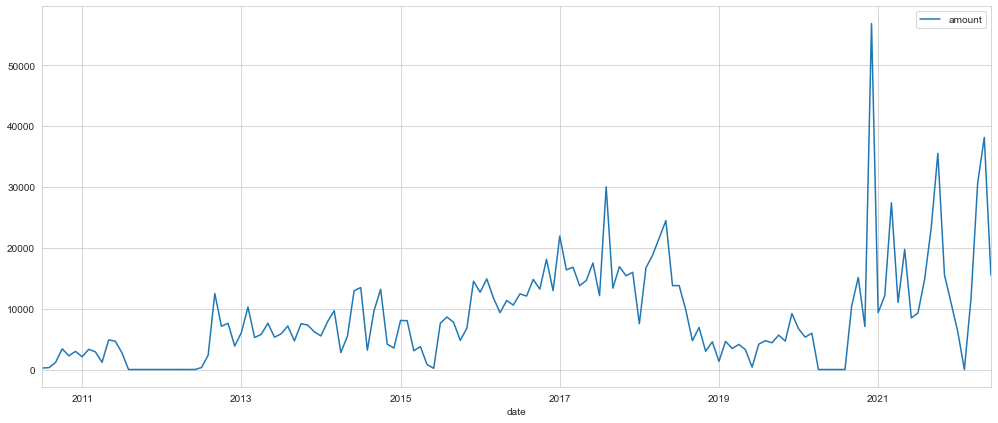

In [306]:
# Plotting categories overtime by month

transactions.resample('M').sum().plot(figsize=(17,7))

In [308]:
transactions['month'] = transactions.index.strftime('%b %d, %Y')

In [309]:
transactions.head()

,description,amount,transaction_type,category,month
date,,,,,
2010-07-31,usaa_com_pmt,241.81,credit,Credit Card Payment,"Jul 31, 2010"
2010-08-05,calling_card,20.00,debit,Donations_and_Gifts,"Aug 05, 2010"
2010-08-05,amazon_music,5.00,debit,Entertainment_and_Sports,"Aug 05, 2010"
2010-08-07,marathon,12.01,debit,Gas,"Aug 07, 2010"
2010-08-07,pennys_noodle_shop,26.42,debit,Outings,"Aug 07, 2010"


In [314]:
transactions.groupby('month').amount.sum().sort_values().head()

month
Jul 29, 2013    0.01
Sep 26, 2013    0.01
Jun 26, 2013    0.01
Mar 28, 2013    0.01
May 29, 2013    0.01
Name: amount, dtype: float64

In [269]:
income = transactions.loc[transactions['category'].str.contains('Income', case=False)]

In [270]:
income

,description,amount,transaction_type,category
date,,,,
2010-09-21,deposit,25.00,credit,Income
2010-09-30,interest_paid,0.33,credit,Interest Income
2010-10-18,mail_deposit,99.00,credit,Income
2010-10-28,exodus_world_ser,429.41,credit,Income
2010-10-29,interest_paid,0.21,credit,Interest Income
...,...,...,...,...
2022-06-13,venmo_cashout______7395,575.00,credit,Income
2022-06-14,varsity_tutors_l_dirdepdd______8777,32.50,credit,Income
2022-06-17,varsity_tutors_l_dirdepdd______8777,32.50,credit,Income


In [271]:
income.describe()

,amount
count,617.000000
mean,574.842545
std,955.736925
min,0.010000
25%,0.100000
50%,65.390000
75%,957.370000
max,10000.000000


<AxesSubplot:xlabel='date'>

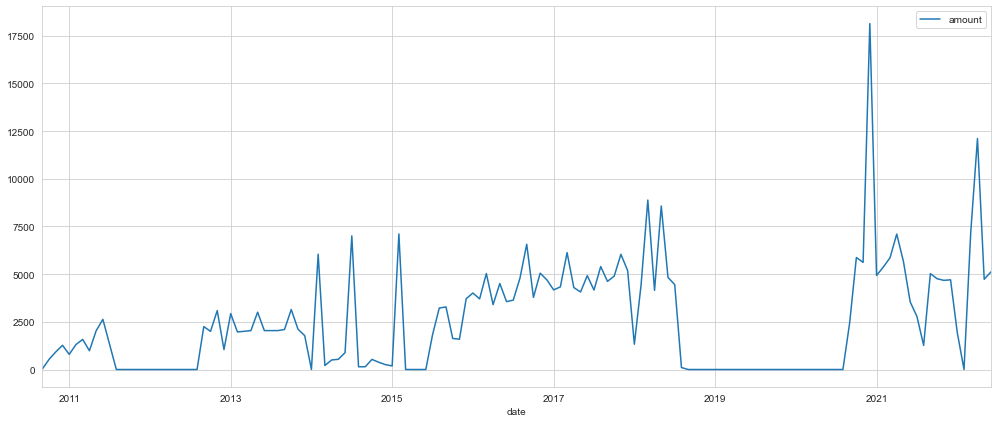

In [275]:
income.resample('M').sum().plot(figsize=(17,7))

In [372]:
income['month'] = income.index.strftime('%b, %Y')

In [373]:
income.head()

,description,amount,transaction_type,category,month
date,,,,,
2010-09-21,deposit,25.00,credit,Income,"Sep, 2010"
2010-09-30,interest_paid,0.33,credit,Interest Income,"Sep, 2010"
2010-10-18,mail_deposit,99.00,credit,Income,"Oct, 2010"
2010-10-28,exodus_world_ser,429.41,credit,Income,"Oct, 2010"
2010-10-29,interest_paid,0.21,credit,Interest Income,"Oct, 2010"


<AxesSubplot:xlabel='month'>

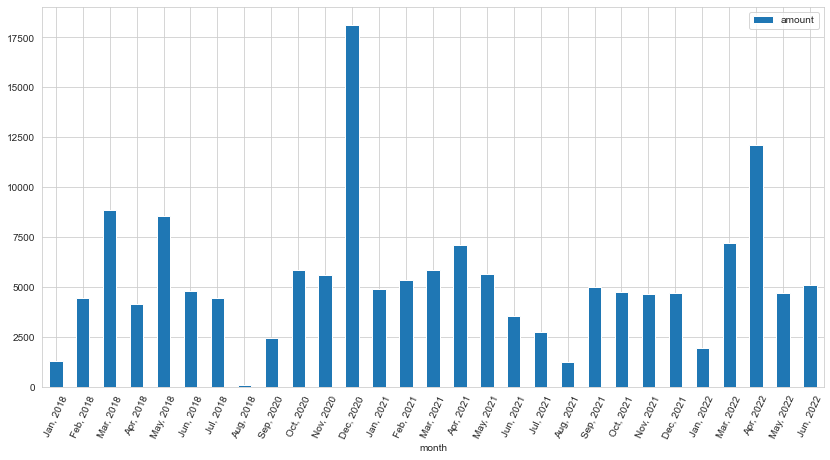

In [386]:
income.loc['Jan, 2018':'Jun, 2022'].groupby('month', sort=False).amount.sum().plot(kind='bar',
                                                             figsize=(14, 7),
                                                             legend=True,
                                                             rot=65)

In [387]:
income.loc['Dec, 2020']

,description,amount,transaction_type,category,month
date,,,,,
2020-12-02,northshore_unive_payroll______9687,2409.43,credit,Income,"Dec, 2020"
2020-12-10,usaa_autodiv_p,31.79,credit,Income,"Dec, 2020"
2020-12-10,deposit_mobile,355.00,credit,Income,"Dec, 2020"
2020-12-15,living_wo_dir_dep_______219,398.55,credit,Income,"Dec, 2020"
2020-12-16,deposit_mobile,30.77,credit,Income,"Dec, 2020"
2020-12-16,northshore_unive_payroll______7158,2256.10,credit,Income,"Dec, 2020"
2020-12-29,interest_paid,0.11,credit,Interest Income,"Dec, 2020"
2020-12-30,northshore_unive_payroll______2660,2256.10,credit,Income,"Dec, 2020"
2020-12-30,living_wo_dir_dep_______219,398.55,credit,Income,"Dec, 2020"


<AxesSubplot:title={'center':'Trailing Twelve Month Income'}, xlabel='month'>

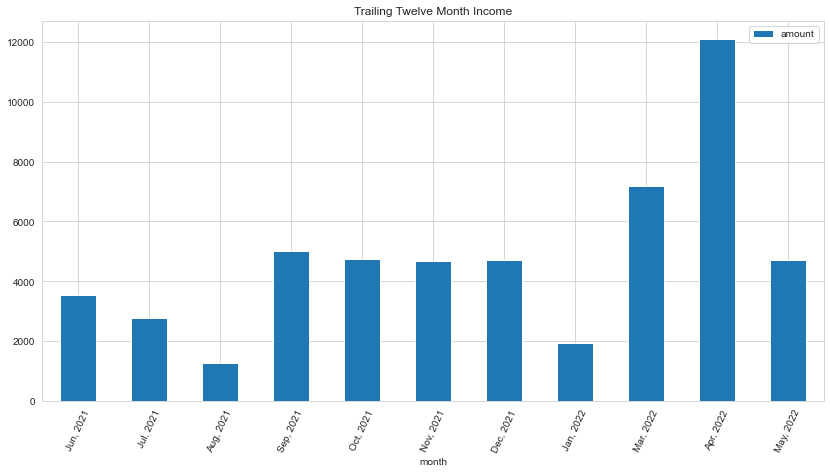

In [388]:
income.loc['Jun, 2021':'May, 2022'].groupby('month', sort=False).amount.sum().plot(kind='bar',
                                                             figsize=(14, 7),
                                                             legend=True,
                                                             rot=65,
                                                             title='Trailing Twelve Month Income')

In [281]:
sns.color_palette('name')

ValueError: name is not a valid palette name

In [272]:
expenses = transactions.loc[~transactions['category'].str.contains('Income', case=False)]

In [273]:
expenses.head()

,description,amount,transaction_type,category
date,,,,
2010-07-31,usaa_com_pmt,241.81,credit,Credit Card Payment
2010-08-05,calling_card,20.00,debit,Donations_and_Gifts
2010-08-05,amazon_music,5.00,debit,Entertainment_and_Sports
2010-08-07,marathon,12.01,debit,Gas
2010-08-07,pennys_noodle_shop,26.42,debit,Outings


In [274]:
expenses.describe()

,amount
count,7180.000000
mean,127.652113
std,546.323277
min,0.010000
25%,7.975000
50%,18.460000
75%,45.462500
max,15000.000000


<AxesSubplot:xlabel='date'>

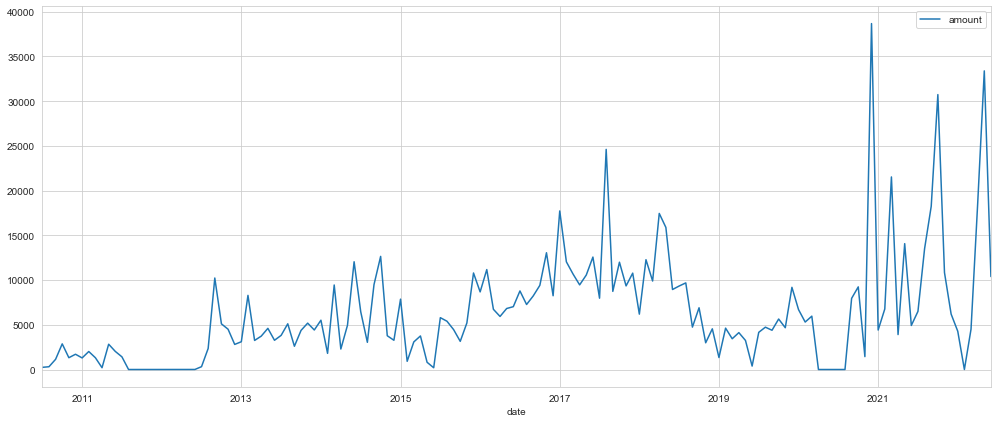

In [288]:
expenses.resample('M').sum().plot(figsize=(17,7))

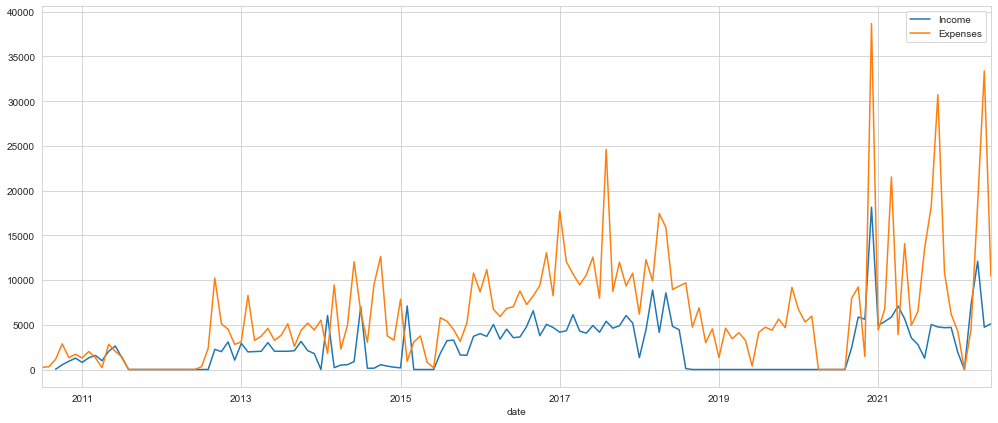

In [292]:
# Overlaying the income and expenses curves to see how they correspond and if it is useful to display

ax = income.resample('M').sum().plot(figsize=(17,7))
expenses.resample('M').sum().plot(figsize=(17,7), ax=ax)
plt.legend(labels=['Income','Expenses'])

, 'Donations_and_Gifts', 'Entertainment_and_Sports', 'Gas', 'Outings', 'Care_and_Shopping', 'Travel', 'Miscellaneous', 'Services_Fees', 'Auto_Payments','Cash', 'Loans', 'Fees', 'Auto_Fees','Public Transportation', 'Books_and_Supplies', 'Mortgage & Rent','Bills_and_Utilities', 'Health_and_Fitness', 'Groceries', 'Taxes','Home_Improvement', 'Education', 'Health', 'Deposit', 'Taxi','Investments', 'Wedding', 'Life Insurance', 'Reimbursement', 'Pet'

In [342]:
transactions.head()

,description,amount,transaction_type,category,month
date,,,,,
2010-07-31,usaa_com_pmt,241.81,credit,Credit Card Payment,"Jul 31, 2010"
2010-08-05,calling_card,20.00,debit,Donations_and_Gifts,"Aug 05, 2010"
2010-08-05,amazon_music,5.00,debit,Entertainment_and_Sports,"Aug 05, 2010"
2010-08-07,marathon,12.01,debit,Gas,"Aug 07, 2010"
2010-08-07,pennys_noodle_shop,26.42,debit,Outings,"Aug 07, 2010"


In [ ]:
plt.rcParams["figure.figsize"] = [17, 7]
plt.rcParams["figure.autolayout"] = True

monthsFmt = mdates.DateFormatter('%B')
yearsFmt = mdates.DateFormatter('\n%Y')

<AxesSubplot:xlabel='amount', ylabel='category'>

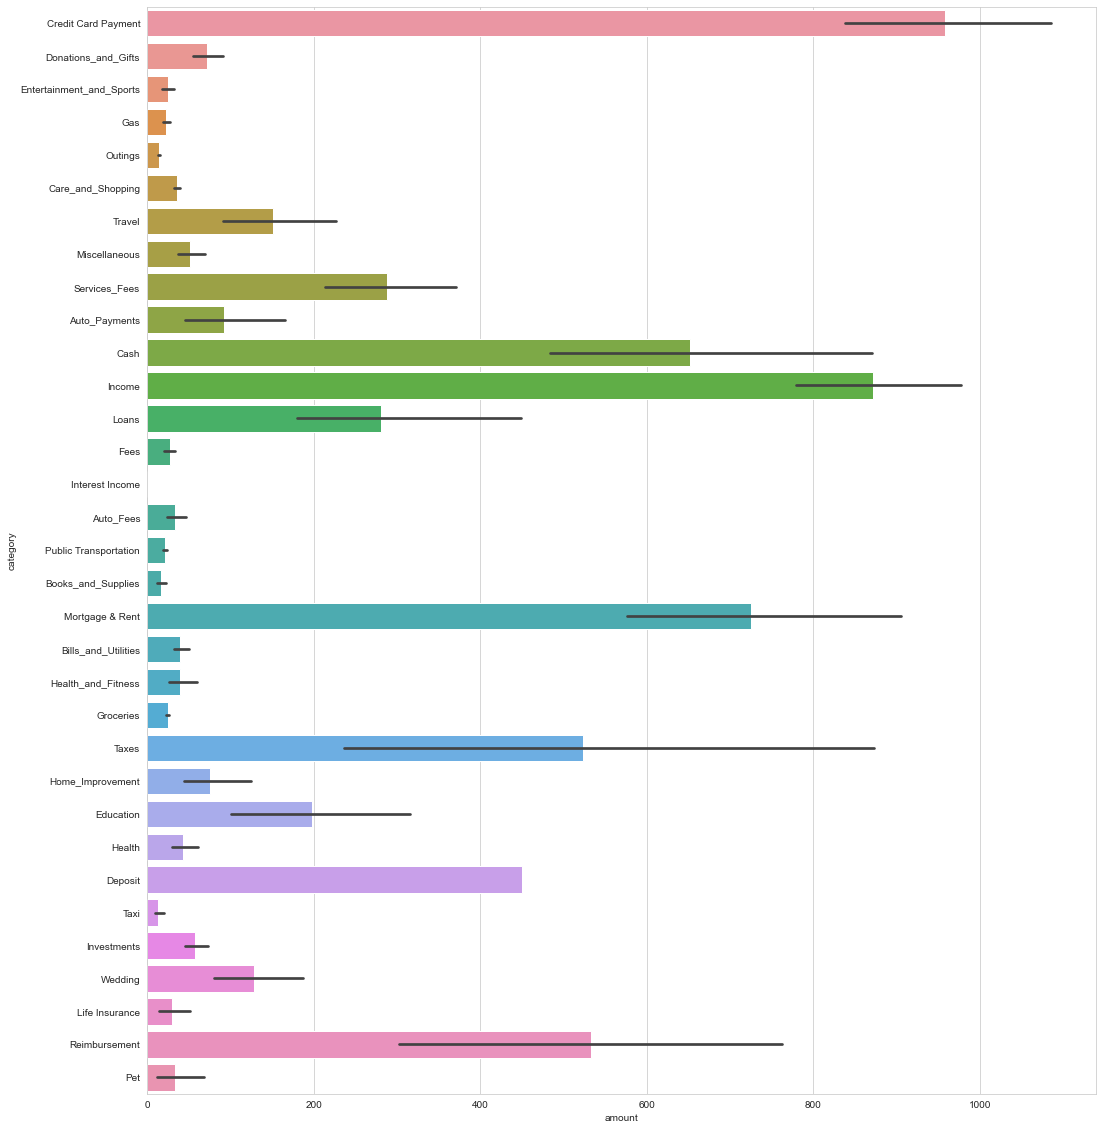

In [134]:
# Plotting categories and their occurence in the dataset
plt.figure(figsize=(17, 20))

sns.set_style("whitegrid") 
sns.barplot(x=transactions., y='category', data=transactions, orient= "h")

In [188]:
transactions.reset_index(inplace=True)
transactions['month'] = transactions.date.dt.month
transactions.groupby(['month','category']).agg('sum')

amount
month category                    
1     Auto_Fees             251.92
      Auto_Payments         229.78
      Bills_and_Utilities  1254.66
      Books_and_Supplies     71.73
      Care_and_Shopping    1738.96
...                            ...
12    Services_Fees        5690.82
      Taxes                1200.00
      Taxi                   84.30
      Travel               1064.49
      Wedding              3100.23

[352 rows x 1 columns]

In [398]:
expenses.head()

,description,amount,transaction_type,category
date,,,,
2010-07-31,usaa_com_pmt,241.81,credit,Credit Card Payment
2010-08-05,calling_card,20.00,debit,Donations_and_Gifts
2010-08-05,amazon_music,5.00,debit,Entertainment_and_Sports
2010-08-07,marathon,12.01,debit,Gas
2010-08-07,pennys_noodle_shop,26.42,debit,Outings


In [412]:
expenses['month'] = expenses.index.strftime('%b, %Y')

<AxesSubplot:title={'center':'Sum of Categories of expenses by month'}, xlabel='month,category'>

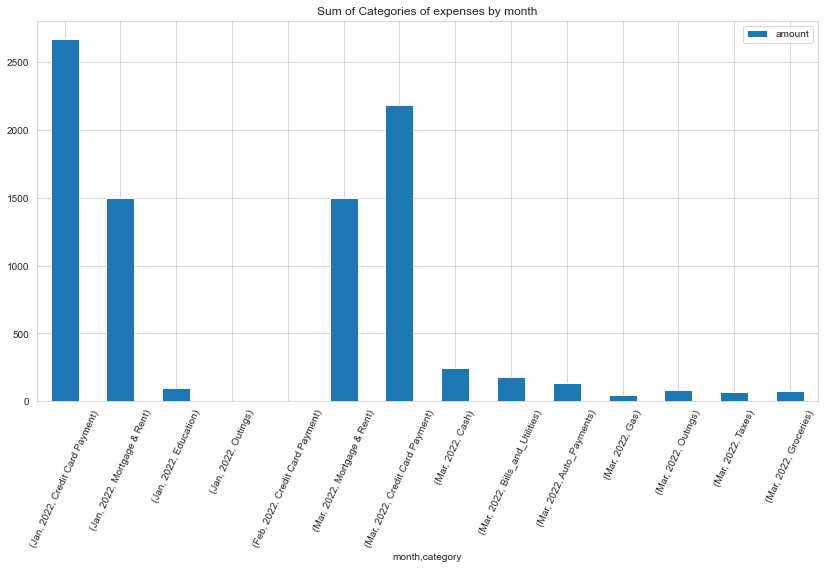

In [414]:
expenses.loc['Jan, 2022':'Mar, 2022'].groupby(['month', 'category'], sort=False).agg('sum').plot(kind='bar',
                                                           figsize=(14, 7),
                                                           legend=True,
                                                           rot=65,
                                                           title='Sum of Categories of expenses by month')

array([<AxesSubplot:title={'center':'amount'}, xlabel='month,category'>],
      dtype=object)

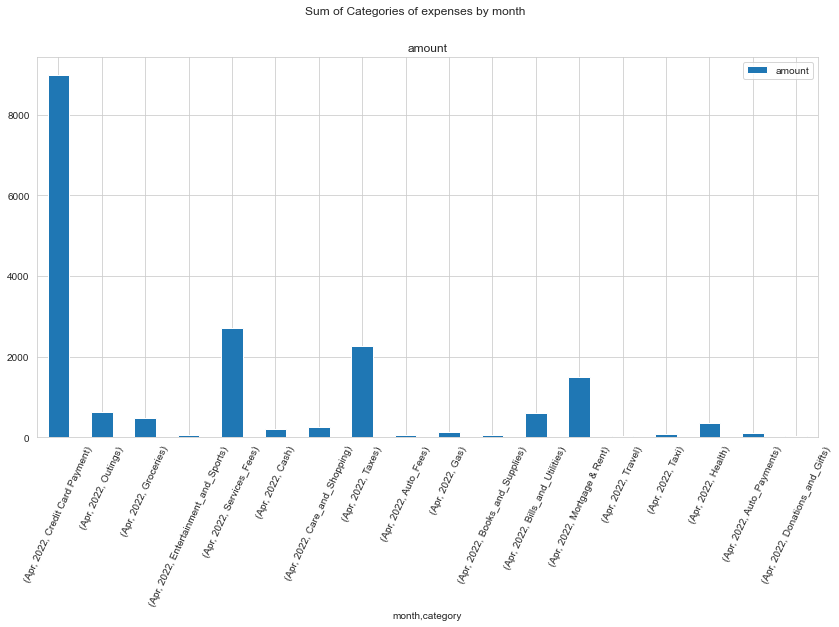

In [425]:
expenses.loc['Apr, 2022'].groupby(['month', 'category'], sort=False).agg('sum').plot(kind='bar',
                                                           figsize=(14, 7),
                                                           subplots=True,
                                                           legend=True,
                                                           rot=65,
                                                           title='Sum of Categories of expenses by month')

array([<AxesSubplot:title={'center':'amount'}, xlabel='month,category'>],
      dtype=object)

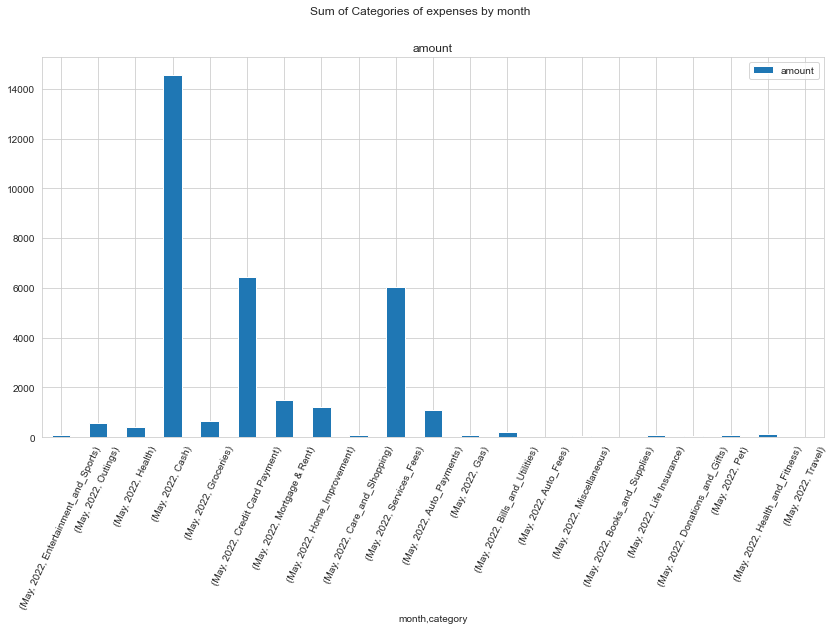

In [426]:
expenses.loc['May, 2022'].groupby(['month', 'category'], sort=False).agg('sum').plot(kind='bar',
                                                           figsize=(14, 7),
                                                           subplots=True,
                                                           legend=True,
                                                           rot=65,
                                                           title='Sum of Categories of expenses by month')

array([<AxesSubplot:title={'center':'amount'}, xlabel='month,category'>],
      dtype=object)

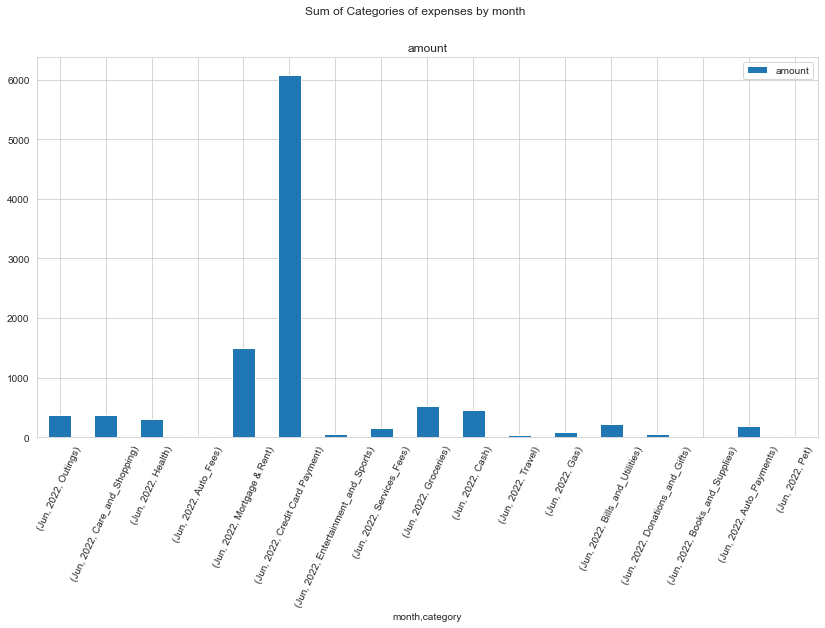

In [427]:
expenses.loc['Jun, 2022'].groupby(['month', 'category'], sort=False).agg('sum').plot(kind='bar',
                                                           figsize=(14, 7),
                                                           subplots=True,
                                                           legend=True,
                                                           rot=65,
                                                           title='Sum of Categories of expenses by month')

<AxesSubplot:xlabel='category'>

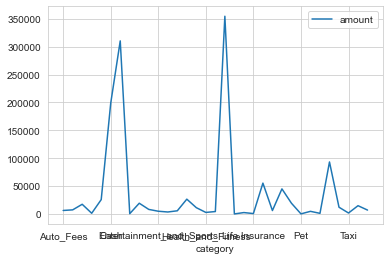

In [210]:
transactions.groupby(['category']).agg('sum').plot()

<AxesSubplot:xlabel='category'>

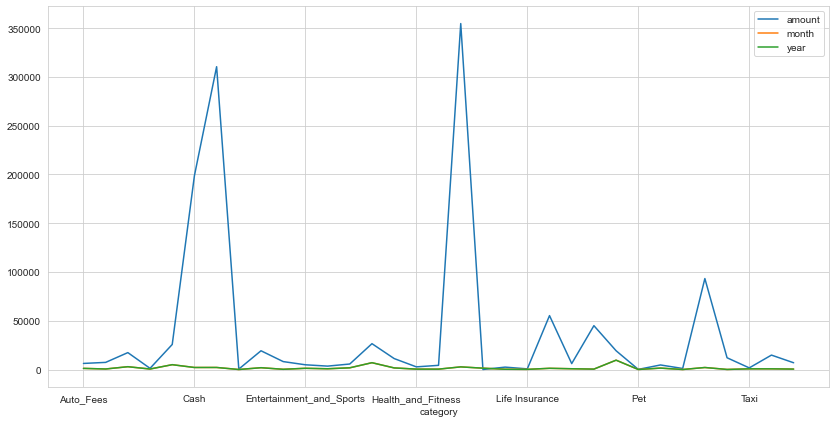

In [192]:
b = transactions.groupby(['category']).agg('sum')
b.plot(figsize=(14,7))

In [189]:
transactions['year'] = transactions.date.dt.month
transactions.groupby(['year','category']).agg('sum')

amount  month
year category                           
1    Auto_Fees             251.92     20
     Auto_Payments         229.78      6
     Bills_and_Utilities  1254.66     39
     Books_and_Supplies     71.73      7
     Care_and_Shopping    1738.96     49
...                           ...    ...
12   Services_Fees        5690.82    348
     Taxes                1200.00     12
     Taxi                   84.30    120
     Travel               1064.49     72
     Wedding              3100.23    252

[352 rows x 2 columns]

<AxesSubplot:xlabel='category'>

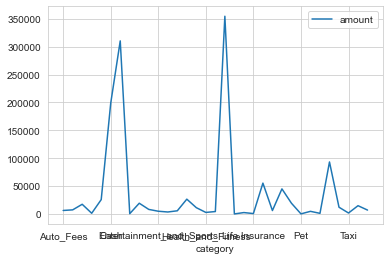

In [208]:
transactions.groupby(['category']).agg('sum').plot()